# Training XOR Functiion using Back Propogation Algorithm Multilayer Perceptron

## Defining class for Multilayer Perceptron Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def sigmoid(x):
    # sigmoid activation function
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    # derivative of sigmoid
    return x * (1 - x)

In [3]:
class NeuralNetwork:
    def __init__(
        self,
        n_inputs,
        n_hidden,
        n_outputs,
        l_rate,
        n_epochs,
        random_state=None,
        activation=sigmoid,
        d_activation=d_sigmoid,
    ):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.activation = activation
        self.d_activation = d_activation
        self.l_rate = l_rate
        self.n_epochs = n_epochs
        if random_state:
            np.random.seed(random_state)
        self.W = [
            np.random.randn(t,f + 1) 
            for t,f in [
                (self.n_hidden,self.n_inputs),
                (self.n_outputs,self.n_hidden)
            ]
        ]
        self.I = [None] * 2
        self.O = [None] * 2
        self.D = [None] * 2

    def add_bias(self, X):
        n = X.shape[1]
        return np.vstack([np.ones((1, n)), X])

    def error(self, T):
        return np.mean(np.square(self.O[1].T - T))

    def forward_propogate(self, X):
        self.I[0] = self.add_bias(X.T)
        self.O[0] = self.activation(self.W[0] @ self.I[0])
        self.I[1] = self.add_bias(self.O[0])
        self.O[1] = self.activation(self.W[1] @ self.I[1])
        return self.O[1]

    def backward_propogate(self, T):
        E = T.T - self.O[1]
        self.D[1] = E * self.d_activation(self.O[1])
        E = self.W[1].T[1:] @ self.D[1]
        self.D[0] = E * self.d_activation(self.O[0])

    def update_weights(self):
        for i in range(2):
            self.W[i] += self.l_rate * self.D[i] @ self.I[i].T

    def fit(self, X, Y):
        for i in range(self.n_epochs): 
            self.forward_propogate(X)
            self.backward_propogate(Y)
            self.update_weights()
            if i-20<0 or self.n_epochs-20-i<0:
                print(f"> epoch:{i}, Loss: {self.error(Y):.5f}")
        return self

    def predict(self, X):
        return self.forward_propogate(X).T



## Defining Dataset for XOR Function

In [8]:
xor = pd.DataFrame([
    [0, 0, 0], 
    [0, 1, 1], 
    [1, 0, 1],
    [1, 1, 0],
],columns=["x1","x2","y"])
X,Y = xor[["x1","x2"]].values, xor[["y"]].values
xor


,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


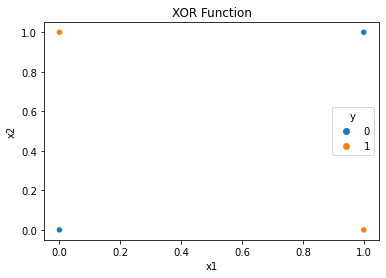

In [9]:
sns.scatterplot(data=xor,x="x1",y="x2",hue="y")
plt.title("XOR Function")
plt.show()

In [10]:
NN = NeuralNetwork(2, 2,1, l_rate=10, n_epochs=5000, random_state=7)
print("Initial Weights")
NN.W

Initial Weights


[array([[ 1.6905257 , -0.46593737,  0.03282016],
        [ 0.40751628, -0.78892303,  0.00206557]]),
 array([[-8.90385858e-04, -1.75472431e+00,  1.01765801e+00]])]

In [11]:
NN.fit(X, Y)
Y_pred = NN.predict(X)

> epoch:0, Loss: 0.29544
> epoch:1, Loss: 0.44390
> epoch:2, Loss: 0.27650
> epoch:3, Loss: 0.40392
> epoch:4, Loss: 0.27909
> epoch:5, Loss: 0.38483
> epoch:6, Loss: 0.30651
> epoch:7, Loss: 0.37320
> epoch:8, Loss: 0.30004
> epoch:9, Loss: 0.33986
> epoch:10, Loss: 0.31502
> epoch:11, Loss: 0.31403
> epoch:12, Loss: 0.31212
> epoch:13, Loss: 0.30339
> epoch:14, Loss: 0.30490
> epoch:15, Loss: 0.29996
> epoch:16, Loss: 0.29995
> epoch:17, Loss: 0.29750
> epoch:18, Loss: 0.29681
> epoch:19, Loss: 0.29541
> epoch:4981, Loss: 0.00003
> epoch:4982, Loss: 0.00003
> epoch:4983, Loss: 0.00003
> epoch:4984, Loss: 0.00003
> epoch:4985, Loss: 0.00003
> epoch:4986, Loss: 0.00003
> epoch:4987, Loss: 0.00003
> epoch:4988, Loss: 0.00003
> epoch:4989, Loss: 0.00003
> epoch:4990, Loss: 0.00003
> epoch:4991, Loss: 0.00003
> epoch:4992, Loss: 0.00003
> epoch:4993, Loss: 0.00003
> epoch:4994, Loss: 0.00003
> epoch:4995, Loss: 0.00003
> epoch:4996, Loss: 0.00003
> epoch:4997, Loss: 0.00003
> epoch:4998, 

In [12]:
print("Trained Weights")
NN.W

Trained Weights


[array([[ 3.18161941, -7.54757044, -7.47635266],
        [ 8.62242094, -5.78732874, -5.77644031]]),
 array([[ -5.72493155, -12.00859217,  11.87787368]])]

In [13]:
pd.DataFrame(
    np.hstack([Y, Y_pred]),
    columns= ["Actual","Predicted"]
)

,Actual,Predicted
0,0.0,0.004591
1,1.0,0.995224
2,1.0,0.995244
3,0.0,0.005885


In [14]:
def plot_decision_boundary(model,x_range,y_range=None,levels=50):
    if y_range is None:
        y_range = x_range
    x = np.linspace(*x_range,100)
    y = np.linspace(*y_range,100)
    X = np.dstack(np.meshgrid(x,y))
    y_pred = model.predict(X.reshape(-1,2)).reshape(X.shape[:2])
    plt.contourf(X[:,:,0],X[:,:,1],y_pred,levels=levels,cmap="gray")

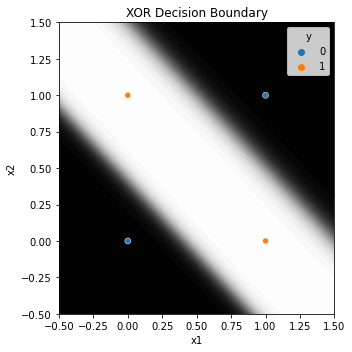

In [15]:
plt.figure(figsize=(5,5),tight_layout=True)
plot_decision_boundary(NN,(-.5,1.5))
sns.scatterplot(data=xor,x="x1",y="x2",hue="y")
plt.title("XOR Decision Boundary")
plt.show()